In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
import math
%matplotlib inline
data = pd.read_csv('thanksgiving.csv', encoding = "Latin1")
data.head(3)

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),...,Have you ever tried to meet up with hometown friends on Thanksgiving night?,"Have you ever attended a ""Friendsgiving?""",Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in retail?,Will you employer make you work on Black Friday?,How would you describe where you live?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,4337954960,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,None,NaN,...,Yes,No,No,No,NaN,Suburban,18 - 29,Male,"$75,000 to $99,999",Middle Atlantic
1,4337951949,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Other (please specify),Homemade cranberry gelatin ring,...,No,No,Yes,No,NaN,Rural,18 - 29,Female,"$50,000 to $74,999",East South Central
2,4337935621,Yes,Turkey,NaN,Roasted,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,Yes,Yes,No,NaN,Suburban,18 - 29,Male,"$0 to $9,999",Mountain


In [2]:
Thanksgiving_counts = data['Do you celebrate Thanksgiving?'].value_counts()
print ('Before filtering: %r'%(Thanksgiving_counts))
thanksgiving_mask = data['Do you celebrate Thanksgiving?'] == 'Yes'
data = data.loc[thanksgiving_mask, :]
print ('AFter filtering: %r'%(data['Do you celebrate Thanksgiving?'].value_counts()))


Before filtering: Yes    980
No      78
Name: Do you celebrate Thanksgiving?, dtype: int64
AFter filtering: Yes    980
Name: Do you celebrate Thanksgiving?, dtype: int64


In [3]:
typical = data['What is typically the main dish at your Thanksgiving dinner?'].value_counts()
print (typical)
tofurkey_mask = data['What is typically the main dish at your Thanksgiving dinner?'] == 'Tofurkey'
data.loc[tofurkey_mask, 'Do you typically have gravy?']           

Turkey                    859
Other (please specify)     35
Ham/Pork                   29
Tofurkey                   20
Chicken                    12
Roast beef                 11
I don't know                5
Turducken                   3
Name: What is typically the main dish at your Thanksgiving dinner?, dtype: int64


4      Yes
33     Yes
69      No
72      No
77     Yes
145    Yes
175    Yes
218     No
243    Yes
275     No
393    Yes
399    Yes
571    Yes
594    Yes
628     No
774     No
820     No
837    Yes
860     No
953    Yes
Name: Do you typically have gravy?, dtype: object

In [4]:
which_pie = 'Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - '
apple_isnull = data[which_pie+'Apple'].isnull()
pumpkin_isnull = data[which_pie+'Pumpkin'].isnull()
pecan_isnull = data[which_pie+'Pecan'].isnull()
ate_pies = apple_isnull & pumpkin_isnull & pecan_isnull
print (ate_pies.value_counts())

False    876
True     104
dtype: int64


In [5]:
print (data['Age'].value_counts()) 

45 - 59    269
60+        258
30 - 44    235
18 - 29    185
Name: Age, dtype: int64


In [6]:
def convert_to_int(string):
    if pd.isnull(string) == True:
        return None
    else:
        age = string.split(" ")[0]
        if "+" in age:
            age = age.replace('+','')
        else: pass
        int_age = int(age)
        return int_age

In [7]:
data['int_age'] = data['Age'].apply(convert_to_int)
print (data['int_age'].dtype)
print (type(data['int_age'][134]))

float64
<type 'numpy.float64'>


Any analysis using these age numbers will always give a lower estimate of the actual ages since we are taking the lowest values from a range. We are also ignoring a number of people (33, see below) who did not fill in the age column. The age bins are also not equal which might bias how many people fall into each bin. 

In [8]:
sum = 0
for ind, value in data['int_age'].iteritems():
    if value == None:
        sum = sum + 1
        print (ind, value)
print (("sum is %r") %(sum))



sum is 0


In [9]:
print (data['How much total combined money did all members of your HOUSEHOLD earn last year?'].value_counts())

$25,000 to $49,999      166
$50,000 to $74,999      127
$75,000 to $99,999      127
Prefer not to answer    118
$100,000 to $124,999    109
$200,000 and up          76
$10,000 to $24,999       60
$0 to $9,999             52
$125,000 to $149,999     48
$150,000 to $174,999     38
$175,000 to $199,999     26
Name: How much total combined money did all members of your HOUSEHOLD earn last year?, dtype: int64


In [10]:
earn = 'How much total combined money did all members of your HOUSEHOLD earn last year?'
def convert_money_to_int(string):
    if pd.isnull(string) == True:
        return None
    elif string.startswith('Prefer'):
        return None
    else:
        string = string.split(' ')[0]
        string = string.replace('$', '').replace(',', '')
        earnings = int(string)
    return earnings

In [11]:
data['int_income'] = data[earn].apply(convert_money_to_int)
data['int_income'].describe()

/Users/home/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


count       829.000000
mean      75965.018094
std       59068.636748
min           0.000000
25%                NaN
50%                NaN
75%                NaN
max      200000.000000
Name: int_income, dtype: float64

In [12]:
print (data['int_income'].value_counts())

25000.0     166
50000.0     127
75000.0     127
100000.0    109
200000.0     76
10000.0      60
0.0          52
125000.0     48
150000.0     38
175000.0     26
Name: int_income, dtype: int64


In [13]:
travel = 'How far will you travel for Thanksgiving?'
higher_income_mask = data['int_income'] > 150000
high_income_data = data[higher_income_mask]
print(high_income_data[travel].value_counts())


Thanksgiving is happening at my home--I won't travel at all                         49
Thanksgiving is local--it will take place in the town I live in                     25
Thanksgiving is out of town but not too far--it's a drive of a few hours or less    16
Thanksgiving is out of town and far away--I have to drive several hours or fly      12
Name: How far will you travel for Thanksgiving?, dtype: int64


This would again be an underestimate of income since we are taking the bottom value of each bin. Also the bins are unequal in size which might add bias. This is very much a ballpark and not a true depiction of incomes in the survey.

In [14]:
income_mask = data['int_income'] < 150000
data_filtered = data[income_mask]   
travel = "How far will you travel for Thanksgiving?"
print(data_filtered[travel].value_counts())

Thanksgiving is happening at my home--I won't travel at all                         281
Thanksgiving is local--it will take place in the town I live in                     203
Thanksgiving is out of town but not too far--it's a drive of a few hours or less    150
Thanksgiving is out of town and far away--I have to drive several hours or fly       55
Name: How far will you travel for Thanksgiving?, dtype: int64


About  half of people earning over 150,000 report that Thanksgiving is happening at their home. While about 75% report that it will happen in the town they live in. This is high compared to ~6% and ~50% respectively for those earning under 150,000.

In [15]:
friends = 'Have you ever tried to meet up with hometown friends on Thanksgiving night?'
fgiving = 'Have you ever attended a "Friendsgiving?"'
data.pivot_table(index = friends, columns = fgiving, values = 'int_age') 

"Have you ever attended a ""Friendsgiving?""",No,Yes
Have you ever tried to meet up with hometown friends on Thanksgiving night?,,
No,42.283702,37.010526
Yes,41.475410,33.976744


# Food by region
Is main dish specific to particular regions?

In [16]:
data['US Region'].value_counts()

South Atlantic        203
Middle Atlantic       145
East North Central    145
Pacific               130
West South Central     85
West North Central     71
East South Central     56
New England            55
Mountain               41
Name: US Region, dtype: int64

In [17]:
data['What is typically the main dish at your Thanksgiving dinner?'].value_counts()

Turkey                    859
Other (please specify)     35
Ham/Pork                   29
Tofurkey                   20
Chicken                    12
Roast beef                 11
I don't know                5
Turducken                   3
Name: What is typically the main dish at your Thanksgiving dinner?, dtype: int64

In [18]:
group = data['What is typically the main dish at your Thanksgiving dinner?'].groupby(data['US Region'])
list(group)
group_value = group.value_counts()
group.value_counts()


US Region           What is typically the main dish at your Thanksgiving dinner?
East North Central  Turkey                                                          135
                    Other (please specify)                                            5
                    Ham/Pork                                                          4
                    Tofurkey                                                          1
East South Central  Turkey                                                           50
                    Other (please specify)                                            4
                    Ham/Pork                                                          1
                    Roast beef                                                        1
Middle Atlantic     Turkey                                                          130
                    Tofurkey                                                          5
                    Other (please speci

In [19]:
group_value_unstacked = group_value.unstack()
group_value_unstacked

What is typically the main dish at your Thanksgiving dinner?,Chicken,Ham/Pork,I don't know,Other (please specify),Roast beef,Tofurkey,Turducken,Turkey
US Region,,,,,,,,
East North Central,NaN,4.0,NaN,5.0,NaN,1.0,NaN,135.0
East South Central,NaN,1.0,NaN,4.0,1.0,NaN,NaN,50.0
Middle Atlantic,1.0,2.0,NaN,4.0,2.0,5.0,1.0,130.0
Mountain,1.0,1.0,NaN,NaN,NaN,2.0,NaN,37.0
New England,2.0,NaN,NaN,1.0,NaN,1.0,NaN,51.0
Pacific,NaN,6.0,1.0,9.0,1.0,4.0,2.0,107.0
South Atlantic,3.0,7.0,NaN,6.0,3.0,3.0,NaN,181.0
West North Central,1.0,4.0,1.0,3.0,NaN,2.0,NaN,60.0
West South Central,1.0,2.0,NaN,3.0,NaN,2.0,NaN,77.0


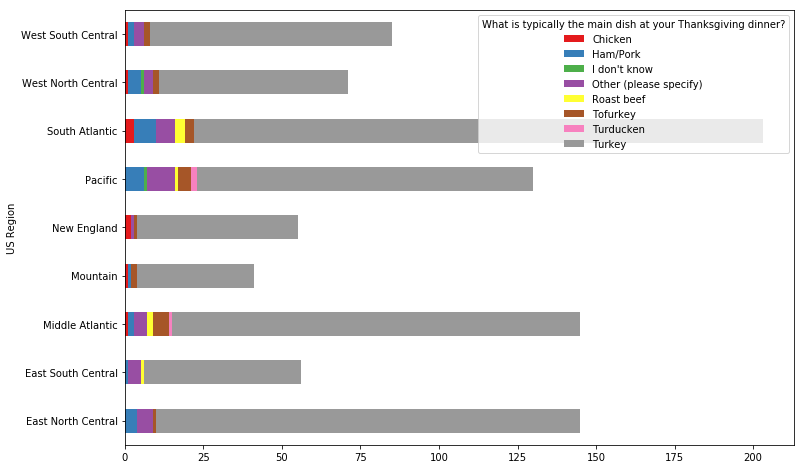

In [20]:
group_value_unstacked.plot(kind='barh', figsize = (12, 8), stacked=True, colormap='Set1')

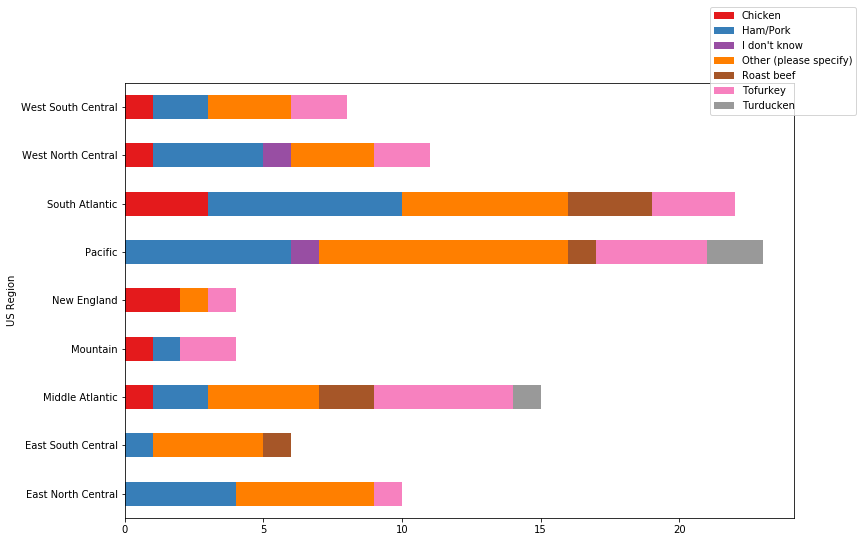

In [21]:
no_turkey_df = group_value_unstacked.drop('Turkey', axis = 1)
fig = no_turkey_df.plot(kind='barh', figsize = (12, 8), stacked=True, colormap='Set1')
plt.legend(loc='center right', bbox_to_anchor=(1.1, 1.05))


In [22]:
group_value_unstacked['non_turkey_total'] = no_turkey_df.sum(axis=1)
group_value_unstacked['pct_non_turkey'] = ((group_value_unstacked['non_turkey_total'] / group_value_unstacked['Turkey']) \
* 100).round(decimals = 1)
group_value_unstacked

What is typically the main dish at your Thanksgiving dinner?,Chicken,Ham/Pork,I don't know,Other (please specify),Roast beef,Tofurkey,Turducken,Turkey,non_turkey_total,pct_non_turkey
US Region,,,,,,,,,,
East North Central,NaN,4.0,NaN,5.0,NaN,1.0,NaN,135.0,10.0,7.4
East South Central,NaN,1.0,NaN,4.0,1.0,NaN,NaN,50.0,6.0,12.0
Middle Atlantic,1.0,2.0,NaN,4.0,2.0,5.0,1.0,130.0,15.0,11.5
Mountain,1.0,1.0,NaN,NaN,NaN,2.0,NaN,37.0,4.0,10.8
New England,2.0,NaN,NaN,1.0,NaN,1.0,NaN,51.0,4.0,7.8
Pacific,NaN,6.0,1.0,9.0,1.0,4.0,2.0,107.0,23.0,21.5
South Atlantic,3.0,7.0,NaN,6.0,3.0,3.0,NaN,181.0,22.0,12.2
West North Central,1.0,4.0,1.0,3.0,NaN,2.0,NaN,60.0,11.0,18.3
West South Central,1.0,2.0,NaN,3.0,NaN,2.0,NaN,77.0,8.0,10.4


There is a small sample size for non Turkey eaters so any conclusions should be taken with a grain of salt. However, it does look like people in the Pacific region eat more non-turkey alternatives with 43% non-turkey eaters. This might be due to a wider range of ethnicities in this region. Lets find out.

# Alternatives to Turkey Mapped to US Map

In [24]:
unique_score =  (group_value_unstacked['pct_non_turkey'] - group_value_unstacked['pct_non_turkey'].min()) \
                   / (group_value_unstacked['pct_non_turkey'].max() - group_value_unstacked['pct_non_turkey'].min())
unique_score

US Region
East North Central    0.000000
East South Central    0.326241
Middle Atlantic       0.290780
Mountain              0.241135
New England           0.028369
Pacific               1.000000
South Atlantic        0.340426
West North Central    0.773050
West South Central    0.212766
Name: pct_non_turkey, dtype: float64

In [25]:
us_region_dict =  {'East North Central': ('Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin'),
                        'East South Central': ('Alabama', 'Kentucky', 'Mississippi', 'Tennessee'),
                        'Middle Atlantic': ('Delaware', 'District of Columbia', 'Maryland', 'New Jersey', 
                                          'New York', 'Pennsylvania', 'West Virginia', 'Virginia'),
                        'Mountain': ('Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico',
                                   'Utah', 'Wyoming'),
                        'New England': ('Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island',
                                      'Vermont'),
                        'Pacific':  ('Alaska', 'California', 'Hawaii', 'Oregon', 'Washington'),
                        'South Atlantic': ('Florida', 'Georgia', 'North Carolina', 'South Carolina'),
                        'West North Central': ("Iowa", "Kansas", "Minnesota", "Missouri", "Nebraska", "North Dakota",
                                             "South Dakota"),
                        'West South Central': ("Arkansas", "Louisiana", "Oklahoma", "Texas")}

df = pd.DataFrame.from_dict(us_region_dict, orient='index')

In [26]:
region_df = df.stack().reset_index(level=1, drop=True)
region_df

West South Central                Arkansas
West South Central               Louisiana
West South Central                Oklahoma
West South Central                   Texas
Mountain                           Arizona
Mountain                          Colorado
Mountain                             Idaho
Mountain                           Montana
Mountain                            Nevada
Mountain                        New Mexico
Mountain                              Utah
Mountain                           Wyoming
Middle Atlantic                   Delaware
Middle Atlantic       District of Columbia
Middle Atlantic                   Maryland
Middle Atlantic                 New Jersey
Middle Atlantic                   New York
Middle Atlantic               Pennsylvania
Middle Atlantic              West Virginia
Middle Atlantic                   Virginia
South Atlantic                     Florida
South Atlantic                     Georgia
South Atlantic              North Carolina
South Atlan

In [27]:
score_dict = {}
for region1, score in unique_score.iteritems():
    for region2, state in region_df.iteritems():
        if region1 == region2:
            score_dict[state] = score

score_dict    

{'Alabama': 0.32624113475177302,
 'Alaska': 1.0,
 'Arizona': 0.24113475177304969,
 'Arkansas': 0.21276595744680851,
 'California': 1.0,
 'Colorado': 0.24113475177304969,
 'Connecticut': 0.028368794326241099,
 'Delaware': 0.29078014184397161,
 'District of Columbia': 0.29078014184397161,
 'Florida': 0.34042553191489355,
 'Georgia': 0.34042553191489355,
 'Hawaii': 1.0,
 'Idaho': 0.24113475177304969,
 'Illinois': 0.0,
 'Indiana': 0.0,
 'Iowa': 0.77304964539007093,
 'Kansas': 0.77304964539007093,
 'Kentucky': 0.32624113475177302,
 'Louisiana': 0.21276595744680851,
 'Maine': 0.028368794326241099,
 'Maryland': 0.29078014184397161,
 'Massachusetts': 0.028368794326241099,
 'Michigan': 0.0,
 'Minnesota': 0.77304964539007093,
 'Mississippi': 0.32624113475177302,
 'Missouri': 0.77304964539007093,
 'Montana': 0.24113475177304969,
 'Nebraska': 0.77304964539007093,
 'Nevada': 0.24113475177304969,
 'New Hampshire': 0.028368794326241099,
 'New Jersey': 0.29078014184397161,
 'New Mexico': 0.24113475177

# Using Basemap to make US MAP
Now I am going to pass the data into Basemap but first let us prep the maps. "llcrnlon" is the longitude of the lower left corner, "llcrnlat" is the latitude of the lower left hand corner, "urcnrlon" is the longitude of the upper right hand cornder and "urcrnrlat" is the latitude of the upper right hand corner for the map. The 'llc' projection works well for square maps. lon_0 specifies the center longitude coordinate for the map. Finally, lat_1 and lat_2 allow you to define an oblique centerline. These coordinates were lifted from the Basemap example file, "fill_states.py" that is distributed with the Basemap package.

In [28]:
# Lambert Conformal map of lower 48 states.
map_lower_48 = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,  
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

This lets Basemap know where in the world we want to focus on. But Basemap does not know anything about the shapes of the U.S states. For this need to provide a shape file.  This is a little confusing because although it is refered to as a shape file, there are actually three files which provide the necessary information. They all have the 'st99_d00' prefix with three different extensions, .dbf, .shp and .shx. The .shp file is a binary file containing geometric data and the .dbf and .shx are supporting files. These are maintained by the ESRI at http://www.esri.com/ We can download these from the basemap github examples branch at https://github.com/matplotlib/basemap/tree/master/examples Next we can use the Basemap  readshapefile( ) function to read in these files. Do not include the extensions and make sure all three files are in the same directory.

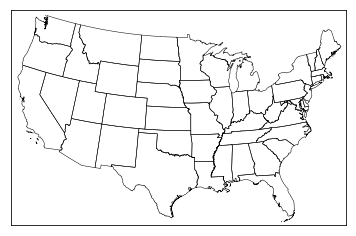

In [29]:
states_shp_info = map_lower_48.readshapefile('st99_d00', 'states',drawbounds=True)

Now we have a varriable called "shp_info" describing a map of the lower forty eight states. Now let us make the Alaska and Hawaii maps

In [30]:
m_alaska = Basemap(llcrnrlon=-173,llcrnrlat=51,urcrnrlon=-134.45,urcrnrlat=71.34,
                   projection='lcc', lat_0=64, lon_0=-151)

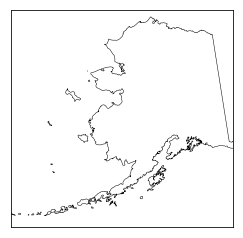

In [31]:
alaska_shp_info = m_alaska.readshapefile('st99_d00', 'states',drawbounds=True)

Hawaii has a very oblong shape so it will be hard to make a square like map. If we leave out the lower left hand and upper right hand corner longitude and latitude we can define a 'great circle' using two points. The coordinates for lat_0 and lon_0 describe the origin of the circle. The arc of the circle itself is described by two points, lon_1, lat_1, and lon_2, lat_2.

In [32]:
m_hawaii = Basemap(#llcrnrlon=-161,llcrnrlat=21,urcrnrlon=-154,urcrnrlat=22,
                   width=800000, height=500000,
                   projection='lcc', 
                   lat_0=20.525, lon_0=-157.385,
                   lon_1=-158.115, lat_1=17.24,
                   lon_2=-153.479, lat_2=19.663, 
                   )

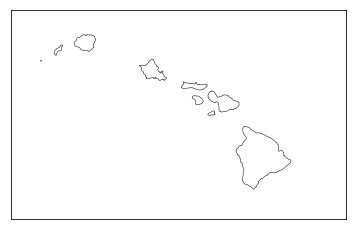

In [33]:
hawaii_shp_info = m_hawaii.readshapefile('st99_d00', 'states',drawbounds=True)

We define the color map we are going to use with, cmap=plt.com.Blues. This will give us a blue spectrum in which dark blues will be assigned a higher score and light blues will have a lower score. Next we can define the maximum and minimum values for our score, vmin = 0; vmax = 1. When we read the shape file into basemap, a dictionary called "shapedict" was created and stored in 'states_shp_info'. This is where the state names and corrosponding shapes reside. for example if we pass the key "NAME" we will get back the state names as values. There are multiple entries for each state.

We want to access shapedict using a for-loop. We initialize a new empty list called 'state_names'. These names will be filled with the names from the shapedict dictionary in the order and frequency that they appear. We want to skip "Puerto Rico" so we add; if state_name is not equal to "Puerto Rico", then the score is equal to our value of score_dict for a particular state_name key. So For every state_name entry in shapedict we get a score which is the unique score taken from score_dict. Next, we define the state_name as a key in the new colors dictionary we are creating. With, 'colors[state_name] = cmap(np.sqrt(score)' We let the key to be equal to the blues spectrum mapped onto the values for score. We use the numpy square root function to use the square root of the scores. This sepearates the valus more making it easier to see color differences.

In [34]:
cmap = plt.cm.Blues
vmin = 0; vmax = 1
colors = {}
state_names = []
for shapedict in map_lower_48.states_info:
    state_name = shapedict['NAME']
    if state_name != 'Puerto Rico':
        score = score_dict[state_name]
        colors[state_name] = cmap(np.sqrt(score))
    state_names.append(state_name)

If we print the colors dictionary we can see that we have the state names as keys and RGB blue values that are scaled to the scores for each state. And we have a list of the state_names.

In [35]:
print colors

{'Mississippi': (0.32628988850442137, 0.61862360630526725, 0.80279892349096504, 1.0), 'Oklahoma': (0.47921568627450983, 0.7150788158400615, 0.85207227989234913, 1.0), 'Wyoming': (0.43529411764705883, 0.69096501345636296, 0.84259900038446756, 1.0), 'Minnesota': (0.031372549019607843, 0.31003460207612454, 0.60046136101499425, 1.0), 'Illinois': (0.96862745098039216, 0.98431372549019602, 1.0, 1.0), 'Georgia': (0.31115724721261057, 0.60828911956939635, 0.7968935024990389, 1.0), 'Arkansas': (0.47921568627450983, 0.7150788158400615, 0.85207227989234913, 1.0), 'New Mexico': (0.43529411764705883, 0.69096501345636296, 0.84259900038446756, 1.0), 'Ohio': (0.96862745098039216, 0.98431372549019602, 1.0, 1.0), 'Indiana': (0.96862745098039216, 0.98431372549019602, 1.0, 1.0), 'Maryland': (0.366643598615917, 0.64618223760092275, 0.81854671280276814, 1.0), 'Louisiana': (0.47921568627450983, 0.7150788158400615, 0.85207227989234913, 1.0), 'Idaho': (0.43529411764705883, 0.69096501345636296, 0.84259900038446

Now we can plot the data. We can add an axis with 'ax = plt.axes()'. Like "Names" above, "nshape" and "seg" are dictionary keys in the maps_lower_48 above. We iterate over these t0 set the color of the shapes with "color = rgb2hex(colors[state_names[nshape]])". The values for nshape are state names. So colors[state_names[n_shape]] will give the rgb color of th a particular state. These are then converted to hex string with the matplotlib rgb2hex( ) function. The next two lines basically tell matplotlib to render the polygons with the colors just defined. Finally we can draw the states with "map_lower_48.drawstates". We can keep the color= color and the linewidth=0 so that we don't see borders around the states. Finally we show the plot with "plt.show( )"

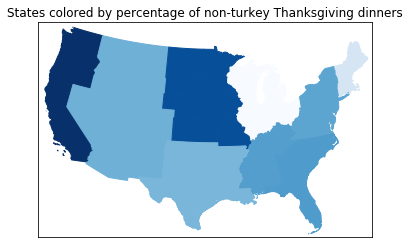

In [36]:
ax = plt.axes()
for nshape, seg in enumerate(map_lower_48.states):
    if state_names[nshape] != 'Puerto Rico':
        color = rgb2hex(colors[state_names[nshape]]) 
        poly = Polygon(seg, facecolor=color, edgecolor=color) 
        ax.add_patch(poly)
map_lower_48.drawstates(color=color, linewidth=0)
plt.title('States colored by percentage of non-turkey Thanksgiving dinners')
plt.show()

This can now be repeated for Alaska and Hawaii. However, it would be nice to do it in one shot and have a little more flexibility with labels. To do this we use the subplot2grid( ) function. We can also play around with the font by importing the font manager in the first line. We then define the figure size and resolution with "fig = plt.figure(figsize = (15, 24), dpi=300)". Don't worry about the next line unless you are really interested. This requires you to download the EBGaramond-Regular.ttf font and point to the directory it is in. We then set the axis properties for the mainland with "ax_mainland = plt.subplot2grid((4,4),(0,0) colspan=4". This creates a four by four grid with a column span of 4. We will not be plotting this many figures but it creates the space we need. The mainland plot will be placed in the upper left hand corner and span the entire grid. Next, we repeat what we did above for the mainland, Alaska and Hawaii.

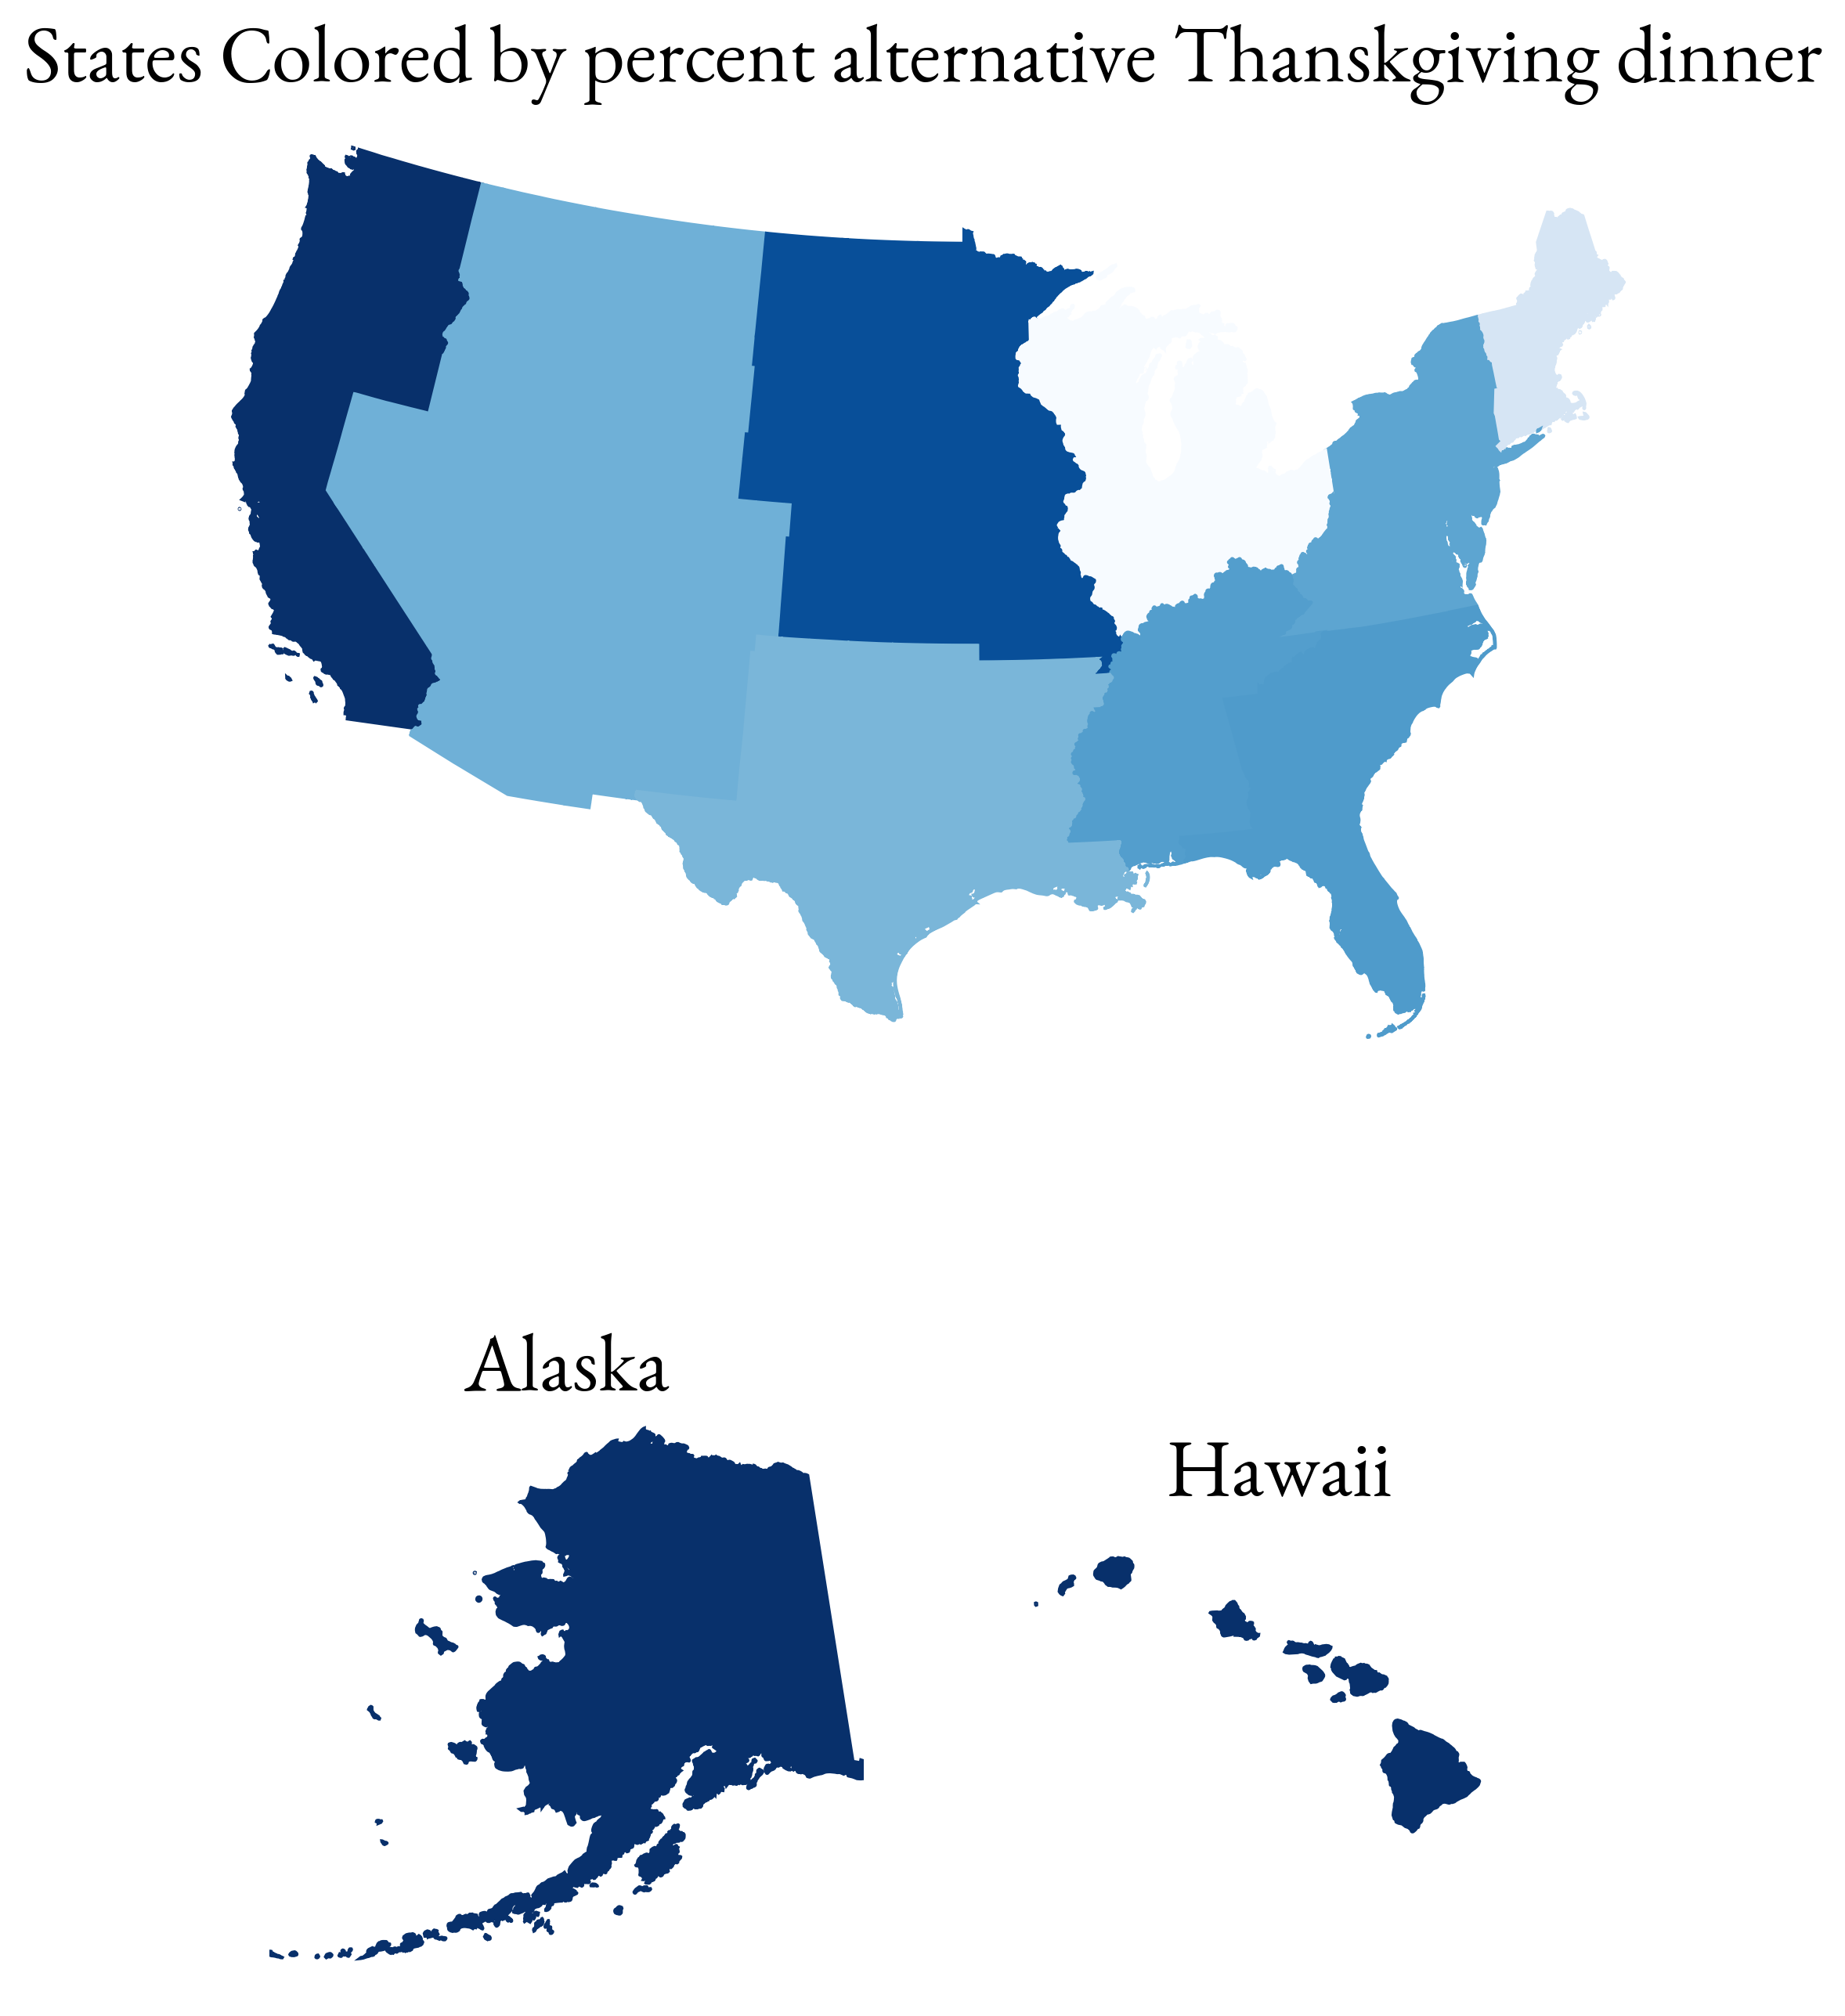

In [37]:
import matplotlib.font_manager as fm
cmap = plt.cm.Blues
vmin = 0; vmax = 1

fig = plt.figure(figsize = (15, 24), dpi=300)
prop = fm.FontProperties(fname='/Users/home/anaconda/pkgs/matplotlib-1.5.3-np111py27_0/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/EBGaramond12-Regular.ttf')

ax_mainland = plt.subplot2grid((4,4),(0,0), colspan=4)
plt.text(0.5, 1.05, "States Colored by percent alternative Thanskgiving dinner",
         horizontalalignment='center',
         fontproperties=prop, fontsize=25,
         transform = ax_mainland.transAxes)
ax_mainland.axis("off")

#map for the lower 48
colors = {}
state_names = []
for shapedict in map_lower_48.states_info:
    state_name = shapedict['NAME']
    if state_name != 'Puerto Rico':
        score = score_dict[state_name]
        colors[state_name] = cmap(np.sqrt(score)) 
        #maps the colors to the states in a dictionary called "colors"
    state_names.append(state_name)

for nshape, seg in enumerate(map_lower_48.states):
    if state_names[nshape] != 'Puerto Rico':
        color = rgb2hex(colors[state_names[nshape]]) 
        mainland_poly = Polygon(seg, facecolor=color, edgecolor=color) 
        ax_mainland.add_patch(mainland_poly)
map_lower_48.drawstates(color=color, linewidth=0)


#Repeat for Alaska
colors = {}
ax_alaska = plt.subplot2grid((4,4), (1,1), colspan = 1)
ax_alaska.set_title('Alaska', fontproperties=prop, fontsize=25)
ax_alaska.axis("off")

for shapedict in m_alaska.states_info:
    score = score_dict['Alaska']
    colors['Alaska'] = cmap(math.sqrt(score))
    state_names.append('Alaska')

for nshape, seg in enumerate(m_alaska.states):
    color_alaska = rgb2hex(colors['Alaska'])
    alaska_poly = Polygon(seg, facecolor=color_alaska, edgecolor=color_alaska)
    ax_alaska.add_patch(alaska_poly)
m_alaska.drawstates(color=color, linewidth=0)

#Repeat for Hawaii
colors = {}
ax_hawaii = plt.subplot2grid((4,4), (1,2), colspan = 1)  
ax_hawaii.set_title('Hawaii', fontproperties=prop, fontsize=25)
ax_hawaii.axis("off")

for shapedict in m_hawaii.states_info:
    score = score_dict['Hawaii']
    colors['Hawaii'] = cmap(math.sqrt(score))
    state_names.append('Hawaii')

for nshape, seg in enumerate(m_hawaii.states):
    color_hawaii = rgb2hex(colors['Hawaii'])
    hawaii_poly = Polygon(seg, facecolor=color_hawaii, edgecolor=color_hawaii)
    ax_hawaii.add_patch(hawaii_poly)
    
m_hawaii.drawstates(color=color_hawaii, linewidth=0)

plt.savefig('state_Thanksgiving_alternative_scores.png', dpi=300) #bbox_inces='tight')


## Lets make the map output into a function I can reuse.

In [ ]:
def make_map():
    
    # Lambert Conformal map of lower 48 states and Hawaii + alaska.
    map_lower_48 = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,\
                           projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
    m_alaska = Basemap(llcrnrlon=-173,llcrnrlat=51,urcrnrlon=-134.45,urcrnrlat=71.34,\
                       projection='lcc', lat_0=64, lon_0=-151)
    m_hawaii = Basemap(width=800000, height=500000,\
                       projection='lcc', lat_0=20.525, lon_0=-157.385,\
                       lon_1=-158.115, lat_1=17.24, lon_2=-153.479, lat_2=19.663)
   
    # Reade in the shape files
    states_shp_info = map_lower_48.readshapefile('st99_d00', 'states',drawbounds=True)
    alaska_shp_info = m_alaska.readshapefile('st99_d00', 'states',drawbounds=True)
    hawaii_shp_info = m_hawaii.readshapefile('st99_d00', 'states',drawbounds=True)
    return [states_shp_info, alaska_shp_info, hawaii_shp_info]
    
#Make a dictionary of state:color with the colorintensity maped to the state score 
#Also make a list with the state names ordered as they are in the shape file.

def map_colors_to_state_scores(score_dict, power):
    make_map() = states_info
    cmap = plt.cm.Blues
    vmin = 0; vmax = 1
    colors = {}
    state_names = []
    for elment in states_info:
        for shapedict in state_shp_info:
            state_name = shapedict['NAME']
            if state_name != 'Puerto Rico':
                score = score_dict[state_name]
                colors[state_name] = cmap((score)**power)
            state_names.append(state_name)
        return colors, state_names
    
    
def make_figure(title='Sample plot'):
    fig = plt.figure(figsize = (15, 24), dpi=300)
#prop = fm.FontProperties(fname='/Users/home/anaconda/pkgs/matplotlib-1.5.3-np111py27_0/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/EBGaramond12-Regular.ttf')
    ax_mainland = plt.subplot2grid((4,4),(0,0), colspan=4)
    plt.text(0.5, 1.05, title, horizontalalignment='center', fontproperties=prop, 
             fontsize=25, transform = ax_mainland.transAxes)
    ax_mainland.axis("off")
    for nshape, seg in enumerate(map_lower_48.states):
        if state_names[nshape] != 'Puerto Rico':
            color = rgb2hex(colors[state_names[nshape]]) 
            mainland_poly = Polygon(seg, facecolor=color, edgecolor=color) 
            ax_mainland.add_patch(mainland_poly)
    colored_map = map_lower_48.drawstates(color=color, linewidth=0)
    return colored_map
    
#Repeat for Alaska
colors = {}
ax_alaska = plt.subplot2grid((4,4), (1,1), colspan = 1)
ax_alaska.set_title('Alaska', fontproperties=prop, fontsize=25)
ax_alaska.axis("off")

for shapedict in m_alaska.states_info:
    score = score_dict['Alaska']
    colors['Alaska'] = cmap(math.sqrt(score))
    state_names.append('Alaska')

for nshape, seg in enumerate(m_alaska.states):
    color_alaska = rgb2hex(colors['Alaska'])
    alaska_poly = Polygon(seg, facecolor=color_alaska, edgecolor=color_alaska)
    ax_alaska.add_patch(alaska_poly)
m_alaska.drawstates(color=color, linewidth=0)

#Repeat for Hawaii
colors = {}
ax_hawaii = plt.subplot2grid((4,4), (1,2), colspan = 1)  
ax_hawaii.set_title('Hawaii', fontproperties=prop, fontsize=25)
ax_hawaii.axis("off")

for shapedict in m_hawaii.states_info:
    score = score_dict['Hawaii']
    colors['Hawaii'] = cmap(math.sqrt(score))
    state_names.append('Hawaii')

for nshape, seg in enumerate(m_hawaii.states):
    color_hawaii = rgb2hex(colors['Hawaii'])
    hawaii_poly = Polygon(seg, facecolor=color_hawaii, edgecolor=color_hawaii)
    ax_hawaii.add_patch(hawaii_poly)
    
m_hawaii.drawstates(color=color_hawaii, linewidth=0)

plt.savefig('state_Thanksgiving_alternative_scores.png', dpi=300) #bbox_inces='tight')



# Ancestory data

In [4]:
#Open ancestory data from census 
anc_data = pd.read_csv('census/ACS_15_5YR_B04004_with_ann.csv')



,GEO.id,GEO.id2,GEO.display-label,HD01_VD01,HD02_VD01,HD01_VD02,HD02_VD02,HD01_VD03,HD02_VD03,HD01_VD04,...,HD01_VD104,HD02_VD104,HD01_VD105,HD02_VD105,HD01_VD106,HD02_VD106,HD01_VD107,HD02_VD107,HD01_VD108,HD02_VD108
0,Id,Id2,Geography,Estimate; Total:,Margin of Error; Total:,Estimate; Total: - Afghan,Margin of Error; Total: - Afghan,Estimate; Total: - Albanian,Margin of Error; Total: - Albanian,Estimate; Total: - Alsatian,...,Estimate; Total: - West Indian (except Hispani...,Margin of Error; Total: - West Indian (except ...,Estimate; Total: - West Indian (except Hispani...,Margin of Error; Total: - West Indian (except ...,Estimate; Total: - West Indian (except Hispani...,Margin of Error; Total: - West Indian (except ...,Estimate; Total: - Yugoslavian,Margin of Error; Total: - Yugoslavian,Estimate; Total: - Other groups,Margin of Error; Total: - Other groups
1,0400000US01,01,Alabama,3045970,12278,36,44,152,124,18,...,47,44,439,212,45,45,329,133,1562021,8830
2,0400000US02,02,Alaska,405842,3896,53,74,300,161,25,...,0,20,178,143,0,20,257,125,231380,3398
3,0400000US04,04,Arizona,4125496,13260,1105,419,1236,454,55,...,48,43,504,171,7,9,5889,944,2467657,11712
4,0400000US05,05,Arkansas,1693963,8258,13,19,92,125,7,...,0,27,77,63,14,25,284,201,845366,6888
